In [1]:
import pandas as pd
# ozone.csv Ozone2 ( 파일을 엑셀로 열어서 필드 추가 결측값을 평균으로 채움)
df = pd.read_csv('c:/data/ozone/ozone.csv')
df


,Ozone,Ozone2,Solar.R,Wind,Temp,Month,Day
0,41.0,41.00000,190.0,7.4,67,5,1
1,36.0,36.00000,118.0,8.0,72,5,2
2,12.0,12.00000,149.0,12.6,74,5,3
3,18.0,18.00000,313.0,11.5,62,5,4
4,NaN,42.12931,NaN,14.3,56,5,5
...,...,...,...,...,...,...,...
148,30.0,30.00000,193.0,6.9,70,9,26
149,NaN,42.12931,145.0,13.2,77,9,27
150,14.0,14.00000,191.0,14.3,75,9,28
151,18.0,18.00000,131.0,8.0,76,9,29


<AxesSubplot:>

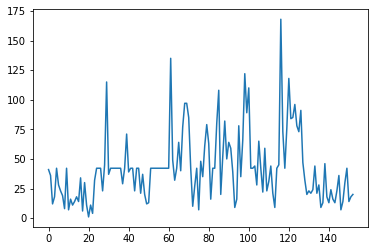

In [2]:
df['Ozone2'].plot()

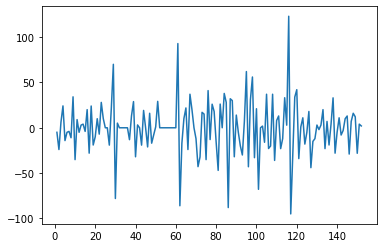

In [3]:
# 1차 차분 데이터
import matplotlib.pyplot as plt
diff1=df['Ozone2'].diff(periods=1).iloc[1:]
diff1.plot()
plt.show()


In [5]:
from statsmodels.tsa.stattools import adfuller
import numpy as np
# adfuller 로그 후 차분한 자료를 함수로 안정적인 시계열인지 확인
diff1=np.log(df['Ozone2']).diff(periods=1).iloc[1:]
result=adfuller(diff1)
print(result)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
#p-value가 0.05보다 작으므로 95% 신뢰수준 하에서 유의함 (안정적인 시계열 자료임)

(-9.189875590807725, 2.1375829069820617e-15, 3, 148, {'1%': -3.4753253063120644, '5%': -2.881274703275226, '10%': -2.5772928360116873}, 289.5529934990679)
ADF Statistic: -9.189876
p-value: 0.000000


In [6]:
from pmdarima.arima import auto_arima
model = auto_arima(df['Ozone2'],suppress_warnings=True)
model
# 가장 적절한 모형은 arima(1,0,1)

ARIMA(order=(1, 0, 1), scoring_args={}, suppress_warnings=True)

In [7]:
# 학습용, 검증용 구분
n=int(df.shape[0]*.8)
train = df[:n]
test = df[n:]
print(len(df['Ozone2']))
print(train['Ozone2'].values)
print(test['Ozone2'].values)

153
[ 41.          36.          12.          18.          42.12931034
  28.          23.          19.           8.          42.12931034
   7.          16.          11.          14.          18.
  14.          34.           6.          30.          11.
   1.          11.           4.          32.          42.12931034
  42.12931034  42.12931034  23.          45.         115.
  37.          42.12931034  42.12931034  42.12931034  42.12931034
  42.12931034  42.12931034  29.          42.12931034  71.
  39.          42.12931034  42.12931034  23.          42.12931034
  42.12931034  21.          37.          20.          12.
  13.          42.12931034  42.12931034  42.12931034  42.12931034
  42.12931034  42.12931034  42.12931034  42.12931034  42.12931034
  42.12931034 135.          49.          32.          42.12931034
  64.          40.          77.          97.          97.
  85.          42.12931034  10.          27.          42.12931034
   7.          48.          35.          61.          

In [8]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train['Ozone2'], order=(1,0,1)).fit()

c:\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [9]:
#예측값
fore = model.forecast(steps=5)
print(fore)
# 예측값, stderr, upper bound, lower bound 

(array([68.40829762, 61.06903396, 56.01411348, 52.53253519, 50.13459689]), array([26.39598988, 27.87511706, 28.54999532, 28.86462454, 29.01268425]), array([[ 1.66731081e+01,  1.20143487e+02],
       [ 6.43480846e+00,  1.15703259e+02],
       [ 5.71508913e-02,  1.11971076e+02],
       [-4.04108934e+00,  1.09106160e+02],
       [-6.72921934e+00,  1.06998413e+02]]))


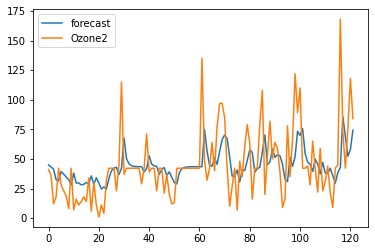

In [10]:
# 실제값과 예측값
model.plot_predict()
plt.show()

[85.         96.         78.         73.         91.         47.
 32.         20.         23.         21.         24.         44.
 21.         28.          9.         13.         46.         18.
 13.         24.         16.         13.         23.         36.
  7.         14.         30.         42.12931034 14.         18.
 20.        ]
[68.40829762 61.06903396 56.01411348 52.53253519 50.13459689 48.48301603
 47.34548912 46.56201705 46.02240038 45.65073921 45.39475744 45.21844991
 45.09701803 45.01338178 44.95577729 44.91610217 44.88877592 44.86995495
 44.85699201 44.84806377 44.84191445 44.8376791  44.834762   44.83275285
 44.83136904 44.83041595 44.8297595  44.82930737 44.82899597 44.82878149
 44.82863377]


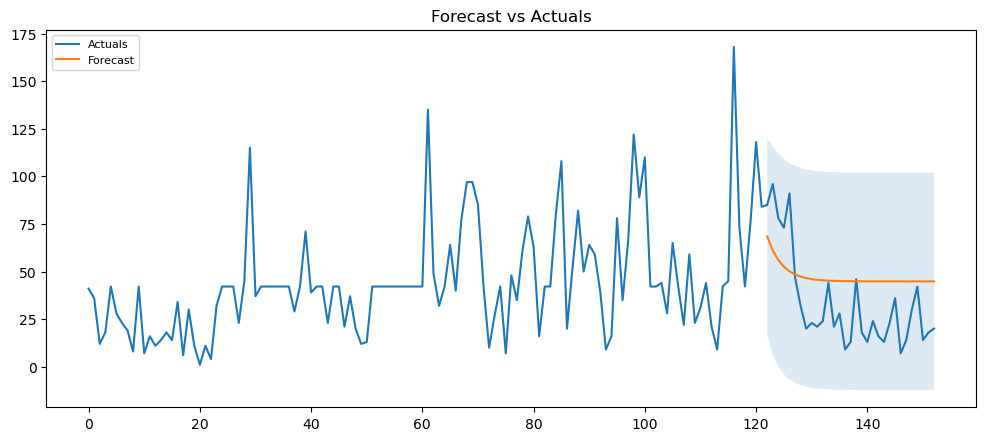

In [11]:
# 예측값, standard error, upper bound/lower bound
fc, se, conf = model.forecast(steps=len(test))
print(test['Ozone2'].values)
print(fc)
fc_series = pd.Series(fc,index=test.index)
lower = pd.Series(conf[:, 0],index=test.index)
upper = pd.Series(conf[:, 1],index=test.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(df['Ozone2'], label='Actuals')
plt.plot(fc_series, label='Forecast')
plt.fill_between(lower.index, lower, upper, alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()